In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [4]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpg7_w24z0GP2
Verbose mode active!


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 80 # was 30 before

In [7]:
#
#
R.setup_data(images, masks, dataset_size=10000, weights=weights)

Weights OK!


In [8]:
RUNS = 5

In [9]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
8/8 [==============================] - 35s 3s/step - loss: 1.3920 - dice_coeff: 0.2230 - val_loss: 1.5365 - val_dice_coeff: 0.1541
Epoch 2/100
8/8 [==============================] - 11s 1s/step - loss: 1.1891 - dice_coeff: 0.2981 - val_loss: 1.5324 - val_dice_coeff: 0.1575
Epoch 3/100
8/8 [==============================] - 11s 1s/step - loss: 1.0731 - dice_coeff: 0.3407 - val_loss: 1.5257 - val_dice_coeff: 0.1604
Epoch 4/100
8/8 [==============================] - 12s 2s/step - loss: 0.9834 - dice_coeff: 0.3758 - val_loss: 1.5164 - val_dice_coeff: 0.1637
Epoch 5/100
8/8 [==============================] - 11s 1s/step - loss: 0.9312 - dice_coeff: 0.3968 - val_loss: 1.5026 - val_dice_coeff: 0.1688
Epoch 6/100
8/8 [==============================] - 11s 1s/step - loss: 0.8909 - dice_coeff: 0.4135 - val_loss: 1.4847 - val_dice_coeff: 0.1758
Epoch 7/100
8/8 [==============================] - 12s 2s/step - loss: 0.8656 - dice_coeff: 0.4249 - val_loss: 1.4580 - val_dice_co

Epoch 58/100
8/8 [==============================] - 12s 2s/step - loss: 0.6598 - dice_coeff: 0.5299 - val_loss: 0.7183 - val_dice_coeff: 0.4956
Epoch 59/100
8/8 [==============================] - 12s 2s/step - loss: 0.6572 - dice_coeff: 0.5312 - val_loss: 0.7163 - val_dice_coeff: 0.4967
Epoch 60/100
8/8 [==============================] - 12s 2s/step - loss: 0.6555 - dice_coeff: 0.5324 - val_loss: 0.7201 - val_dice_coeff: 0.4937
Epoch 61/100
8/8 [==============================] - 12s 2s/step - loss: 0.6528 - dice_coeff: 0.5334 - val_loss: 0.7161 - val_dice_coeff: 0.4968
Epoch 62/100
8/8 [==============================] - 12s 2s/step - loss: 0.6499 - dice_coeff: 0.5350 - val_loss: 0.7177 - val_dice_coeff: 0.4957
Epoch 63/100
8/8 [==============================] - 12s 2s/step - loss: 0.6475 - dice_coeff: 0.5362 - val_loss: 0.7192 - val_dice_coeff: 0.4943
Epoch 64/100
8/8 [==============================] - 12s 2s/step - loss: 0.6466 - dice_coeff: 0.5371 - val_loss: 0.7182 - val_dice_coeff:

AttributeError: 'Collection' object has no attribute 'keys'

In [10]:
R.classifier_scores

[[0.36250168085098267, 0.7209513783454895],
 [0.18394052982330322, 0.8621875047683716],
 [0.10315718501806259, 0.9341450333595276],
 [0.08377128094434738, 0.9563454985618591],
 [0.08719967305660248, 0.956550121307373]]

In [11]:
R.discriminator_scores

[[0.8372218012809753, 0.5083333253860474],
 [0.8539556860923767, 0.5166666507720947],
 [0.8621125221252441, 0.4933333396911621],
 [0.8202974200248718, 0.528333306312561],
 [0.8091117739677429, 0.5366666913032532]]

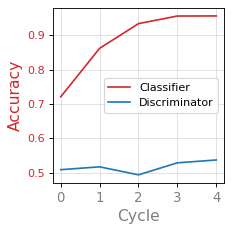

In [12]:
R.plot()